# 10: Quantum Fourier Transform

In [1]:
from renom_q import *
import math

## 10-1: Quantum Fourier Transform $QFT_4$

A quantum Fourier transform $QFT_N$ which becomes $N=2^n$ in the case of general $n$ qubit

$$\left| x \right\rangle \xrightarrow{QFT_N} \frac{1}{\sqrt{N}} \sum^{N-1}_{y=0} \omega^{x \cdot y} \left| y \right\rangle $$

$\omega = \exp{(2\pi i / N)}$ is the phase of rotation.

Assuming that the decimal number is $j$,
$$\left| j \right\rangle \xrightarrow{QFT_N} \frac{1}{\sqrt{N}} \left( \left| 0 \right\rangle + e^{2\pi i 0.j_n} \left| 1 \right\rangle \right) \otimes \left( \left| 0 \right\rangle + e^{2\pi i 0.j_{n-1} j_n} \left| 1 \right\rangle \right) \otimes \dots \otimes \left( \left| 0 \right\rangle + e^{2\pi i 0.j_1 j_2 \dots j_{n-1} j_n} \left| 1 \right\rangle \right)$$

The quantum Fourier transform of $N=4$,
$$\left| x_1 x_2 \right\rangle \xrightarrow{QFT_4} \frac{1}{\sqrt{4}} \left( \left| 0 \right\rangle + e^{2\pi i 0.x_2} \left| 1 \right\rangle \right) \left( \left| 0 \right\rangle + e^{2\pi i 0.x_1 x_2} \left| 1 \right\rangle \right)$$

For example, the quantum Fourier transform of $\left| 10 \right\rangle$,
$$\left| 10 \right\rangle \xrightarrow{QFT_4} \frac{1}{\sqrt{4}} \left( \left| 0 \right\rangle + e^{2\pi i 0.0} \left| 1 \right\rangle \right) \left( \left| 0 \right\rangle + e^{2\pi i 0.10} \left| 1 \right\rangle \right) = \frac{1}{2}\left( \left| 0 \right\rangle + \left| 1 \right\rangle \right) \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right) = \frac{1}{2}\left( \left| 00 \right\rangle - \left| 01 \right\rangle + \left| 10 \right\rangle - \left| 11 \right\rangle \right) = \frac{1}{2}\left( \left| 0 \right\rangle - \left| 1 \right\rangle + \left| 2 \right\rangle - \left| 3 \right\rangle \right)$$

{'00': 273, '01': 262, '10': 255, '11': 234}


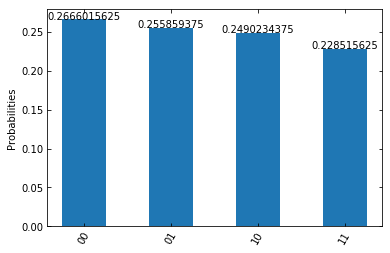

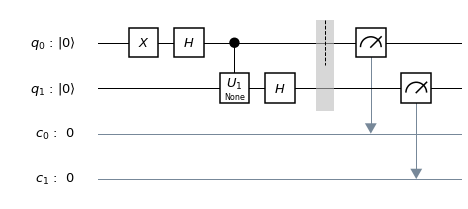

In [2]:
bn = 2
q = QuantumRegister(bn)
c = ClassicalRegister(bn)
qc = QuantumCircuit(q, c)

qc.x(q[0])
qc.h(q[0])
qc.cu1(math.pi/2, q[0], q[1])
qc.h(q[1])
qc.barrier()
qc.measure()

r = execute(qc)
print(r)
plot_histogram(r)
draw_circuit(qc)

After the quantum Fourier transform, the upper bit and the lower bit are reversed, so it is necessary to swap the upper and lower by the swap gate.

{'00': 197, '01': 277, '10': 274, '11': 276}


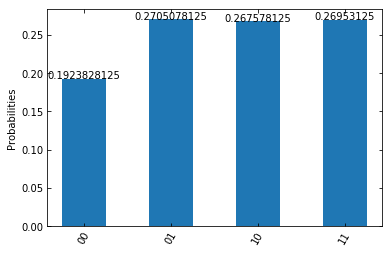

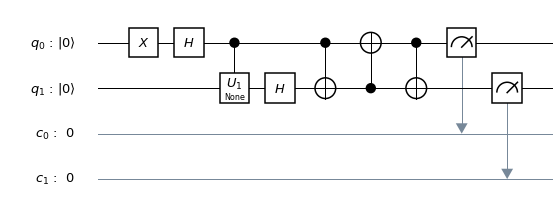

In [3]:
def swap(qci, s1, s2):
    qci.cx(q[s1], q[s2])
    qci.cx(q[s2], q[s1])
    qci.cx(q[s1], q[s2])

bn = 2
q = QuantumRegister(bn)
c = ClassicalRegister(bn)
qc = QuantumCircuit(q, c)

qc.x(q[0])
qc.h(q[0])
qc.cu1(math.pi/2, q[0], q[1])
qc.h(q[1])
swap(qc, 0, 1)
qc.measure()

r = execute(qc)
print(r)
plot_histogram(r)
draw_circuit(qc)

## 10-2: Quantum Fourier Transform $QFT_{N}$

The quantum gate of the quantum Fourier transform uses the controlled phase rotation gate $cR_n$.
$$cR_n=cU_1\left(\frac{2\pi}{2^n}\right)= \left(
\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{i(2\pi/2^n)}
\end{array}
\right)$$

The quantum Fourier transform of $N=16$,
$$\left| x_1 x_2 x_3 x_4 \right\rangle \xrightarrow{QFT_{16}} \frac{1}{\sqrt{16}} \left( \left| 0 \right\rangle + e^{2\pi i 0.x_4} \left| 1 \right\rangle \right) \left( \left| 0 \right\rangle + e^{2\pi i 0.x_3 x_4} \left| 1 \right\rangle \right) \left( \left| 0 \right\rangle + e^{2\pi i 0.x_2 x_3 x_4} \left| 1 \right\rangle \right) \left( \left| 0 \right\rangle + e^{2\pi i 0.x_1 x_2 x_3 x_4} \left| 1 \right\rangle \right)$$

the controlled phase rotation gate $cR_4$,
$$cR_4=cU_1\left(\frac{2\pi}{2^4}\right)= \left(
\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{i(\pi/8)}
\end{array}
\right)$$

{'0000': 1024}


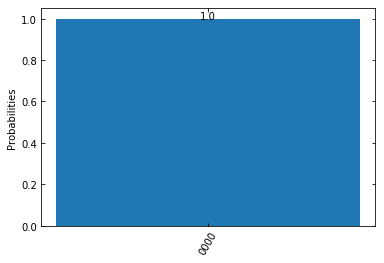

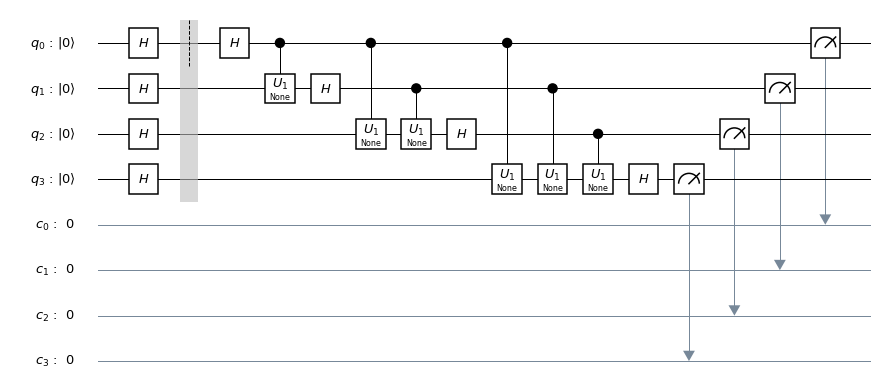

In [4]:
def qft(qci, q, n):
    for i in range(n):
        for j in range(i):
            qci.cu1(math.pi/float(2**(i-j)), q[j], q[i])
        qci.h(q[i])

bn = 4
q = QuantumRegister(bn)
c = ClassicalRegister(bn)
qc = QuantumCircuit(q, c)

for i in range(bn):
    qc.h(q[i])
qc.barrier()
qft(qc, q, bn)
qc.measure()

r = execute(qc)
print(r)
plot_histogram(r)
draw_circuit(qc)

## 10-3: Inverse quantum Fourier Transform $QFT^{-1}_{N}$

A quantum Fourier transform $QFT^{-1}_N$ which becomes $N=2^n$ in the case of general $n$ qubit

$$\left| x \right\rangle \xrightarrow{QFT_{N^{-1}}} \frac{1}{\sqrt{N}} \sum^{N-1}_{y=0} \omega^{-x \cdot y} \left| y \right\rangle $$

Use the Hermitian conjugate $cR^{\dagger}_n$ of the controlled phase rotation gate.
$$cR^{\dagger}_n=cU_1\left(-\frac{2\pi}{2^n}\right)= \left(
\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{-i(2\pi/2^n)}
\end{array}
\right)$$

The inverse quantum Fourier transform of $N=16$,
$$\left| 0000 \right\rangle \xrightarrow{H \otimes H \otimes H \otimes H} 
= \frac{\left| 0 \right\rangle + e^{2\pi i0.0}\left| 1 \right\rangle}{\sqrt{2}} \frac{\left| 0 \right\rangle + e^{2\pi i0.00}\left| 1 \right\rangle}{\sqrt{2}} \frac{\left| 0 \right\rangle + e^{2\pi i0.000}\left| 1 \right\rangle}{\sqrt{2}} \frac{\left| 0 \right\rangle + e^{2\pi i0.0000}\left| 1 \right\rangle}{\sqrt{2}} \xrightarrow{QFT^{-1}_{16}} \left| 0000 \right\rangle$$

{'0000': 1024}


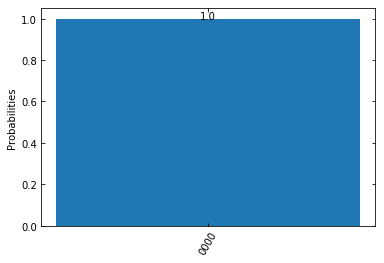

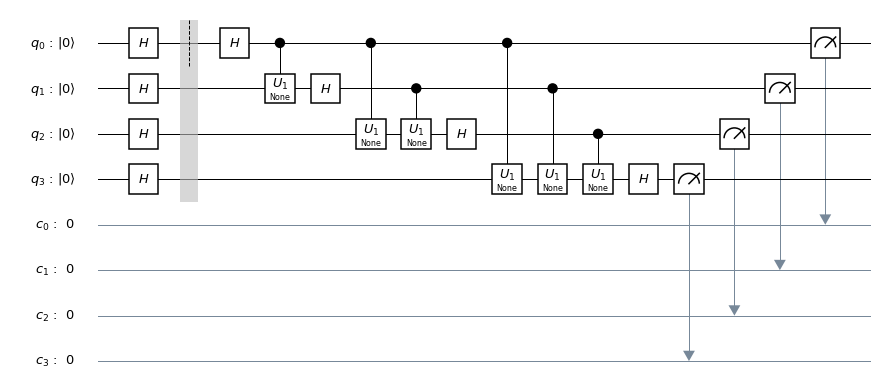

In [5]:
def iqft(qci, q, n):
    for i in range(n):
        for j in range(i):
            qci.cu1(-math.pi/float(2**(i-j)), q[j], q[i])
        qci.h(q[i])
        
bn = 4
q = QuantumRegister(bn)
c = ClassicalRegister(bn)
qc = QuantumCircuit(q, c)

for i in range(bn):
    qc.h(q[i])
qc.barrier()
iqft(qc, q, bn)
qc.measure()

r = execute(qc)
print(r)
plot_histogram(r)
draw_circuit(qc)